# Breast Cancer Prediction
### In this project I predict if a tumor is malignant or benign based on Breast Cancer Wisconsin (Diagnostic) Data Set

### Step 1: Importing the libraries, reading and exploring data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# I read the file as a list names BC (Breast Cancer)
BC = pd.read_csv('cancer_classification.csv')

In [3]:
BC.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

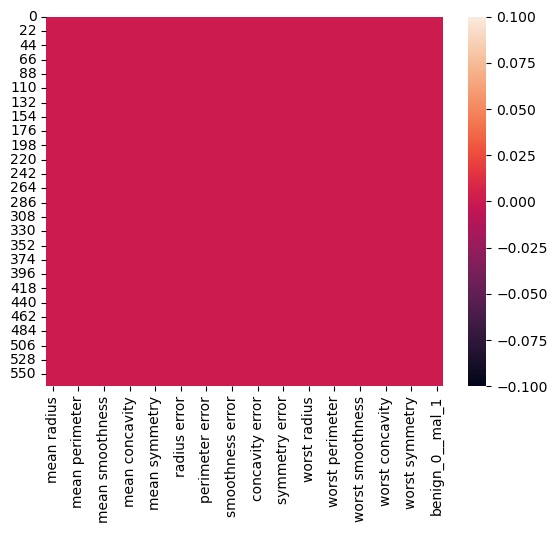

In [5]:
# Let's check for any missing values
sns.heatmap(BC.isnull())

In [6]:
BC.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
# Let's check and see if we can find any relationships between the features
BC[BC.columns[0:10]]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


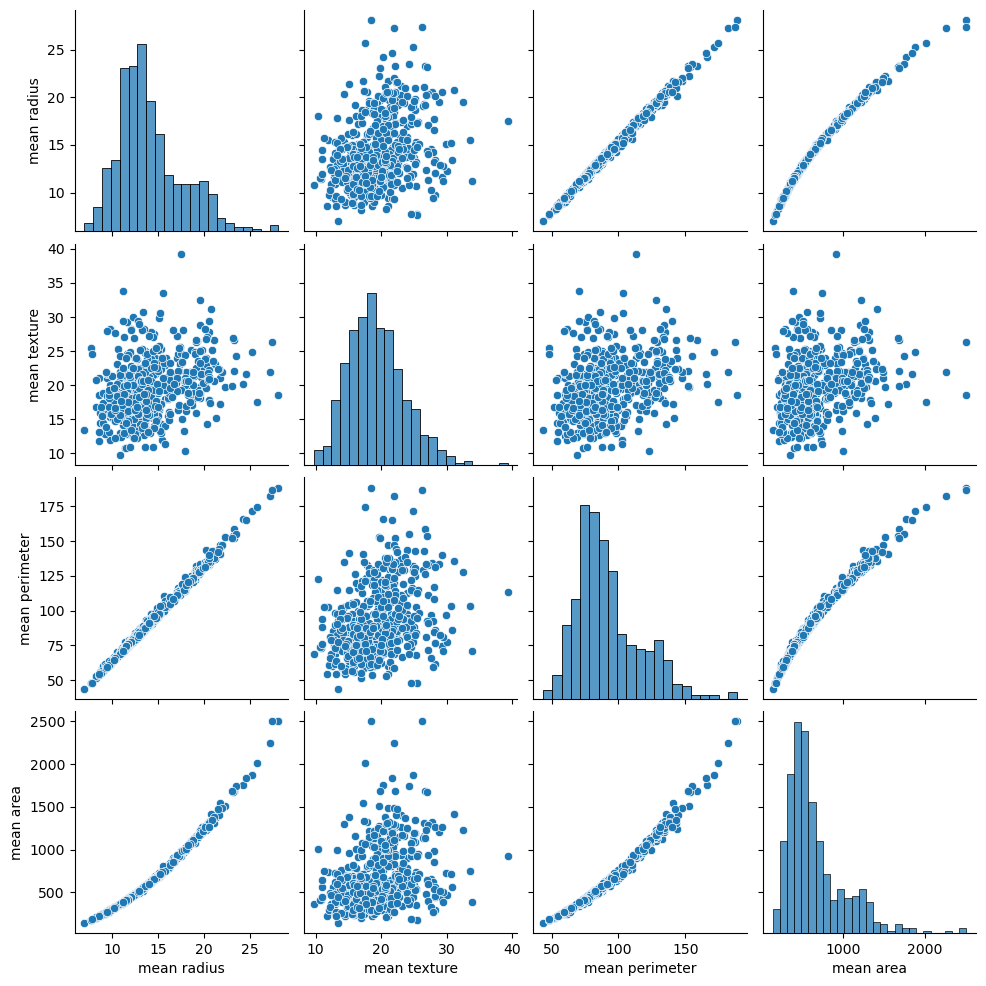

In [8]:
sns.pairplot(BC[BC.columns[0:4]])

**It makes sense to see that there is a strong correlation between 'mean perimeter' and 'mean area' or between 'mean radius' and 'mean perimeter'. On the other hand 'mean texture' looks uncorrelated to any of these other three features.**

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

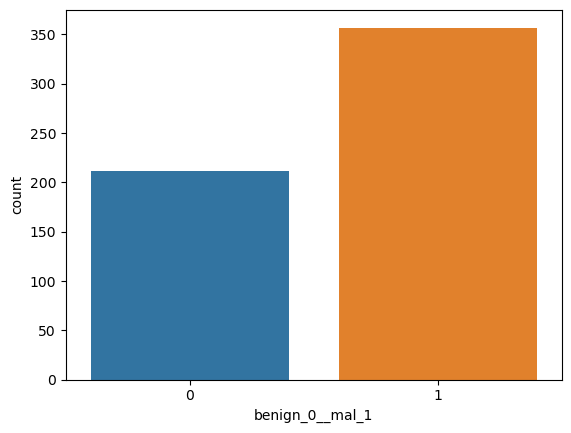

In [9]:
sns.countplot('benign_0__mal_1',data = BC)

<AxesSubplot:>

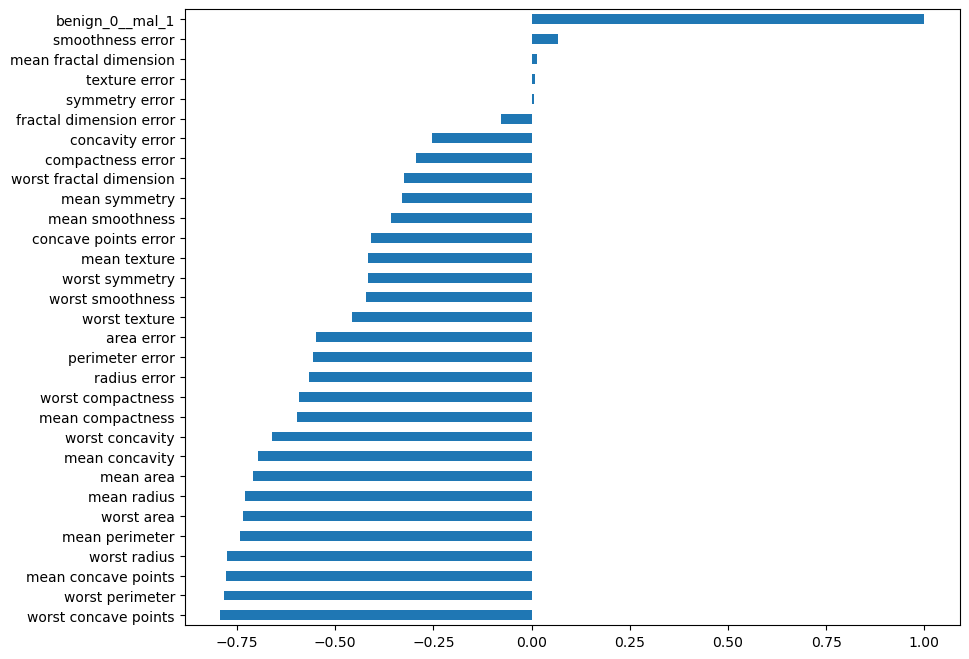

In [10]:
#Let's check the correlation between the different features and the target column
plt.figure(figsize=(10,8))
BC.corr()['benign_0__mal_1'].sort_values().plot(kind = 'barh')

**I would rather not remove any features enen if some of them show close correlation with the target.**

### Step 2: Building the models.
### Model 1: Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split

X = BC.drop('benign_0__mal_1',axis=1)
y = BC['benign_0__mal_1']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
MMC = MinMaxScaler()
X_train = MMC.fit_transform(X_train)
X_test = MMC.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
prediction_1 = LR.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(prediction_1,y_test))
print(confusion_matrix(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        58
           1       0.99      0.92      0.95       113

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

[[ 57   9]
 [  1 104]]


**Logistic Regression worked pretty good. I would just try other methods to see whether I can find better performance or not.***

### Model 2: K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

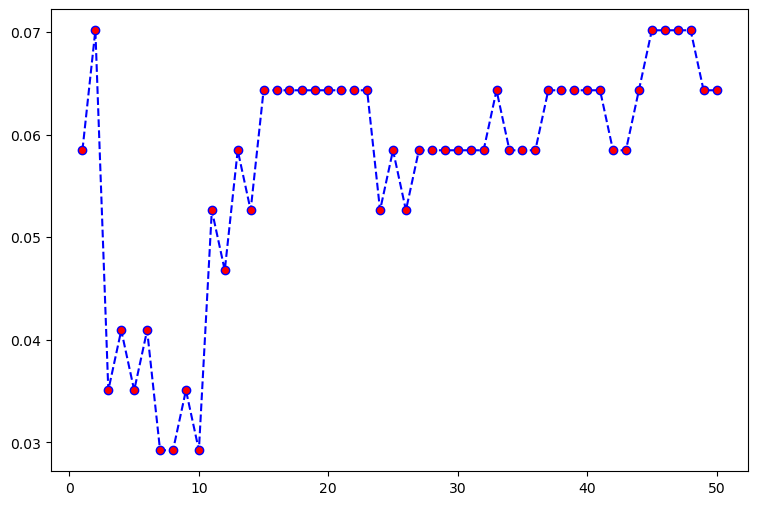

In [20]:
error_rate = []
for i in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    prediction_i = KNN.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
plt.figure(figsize=(9,6))
plt.plot(range(1,51),error_rate, linestyle ='dashed', color = 'blue',marker = 'o', markerfacecolor = 'red')

**Looks like the difference between the prediction and y_test is the least when k = 7,8 or 9**

In [21]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
prediction_2 = KNN.predict(X_test)

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
print(classification_report(prediction_2,y_test))
print(confusion_matrix(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 62   4]
 [  1 104]]


**K Nearest Neighbors worked even better than Logistic Regression.**

### Model 3: Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
prediction_3 = DTC.predict(X_test)

In [25]:
print(classification_report(prediction_3,y_test))
print(confusion_matrix(y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.91      0.93      0.92       103

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

[[59  7]
 [ 9 96]]


### Model 4: Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train,y_train)
prediction_4 = RFC.predict(X_test)

In [28]:
print(classification_report(prediction_4,y_test))
print(confusion_matrix(y_test,prediction_4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.96      0.96      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[ 62   4]
 [  4 101]]


### Model 5: eXtreme Gradient Boost

In [29]:
from xgboost import XGBClassifier

In [30]:
XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)
prediction_5 = XGBC.predict(X_test)

In [31]:
print(classification_report(prediction_5,y_test))
print(confusion_matrix(y_test,prediction_5))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.97      0.98      0.98       104

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 64   2]
 [  3 102]]


### Model 6: Support Vector Machine 

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()
svc.fit(X_train,y_train)
prediction_6 = svc.predict(X_test)

In [34]:
print(classification_report(prediction_6,y_test))
print(confusion_matrix(y_test,prediction_6))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 62   4]
 [  1 104]]


**Let's see if we can improve the performance of SVM model we made by manipulating the kernel.**

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
Grid_svc = GridSearchCV(SVC(), parameters, verbose = 3, cv = 10)
Grid_svc.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ...................C=0.1, gamma=1;, score=0.925 total time=   0.0s
[CV 2/10] END ...................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 3/10] END ...................C=0.1, gamma=1;, score=0.925 total time=   0.0s
[CV 4/10] END ...................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 5/10] END ...................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 6/10] END ...................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 7/10] END ...................C=0.1, gamma=1;, score=0.950 total time=   0.0s
[CV 8/10] END ...................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 9/10] END ...................C=0.1, gamma=1;, score=0.974 total time=   0.0s
[CV 10/10] END ..................C=0.1, gamma=1;, score=0.974 total time=   0.0s
[CV 1/10] END .................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 2/10] END .................C=0.1, gamma=0.

[CV 4/10] END ..................C=10, gamma=0.1;, score=0.975 total time=   0.0s
[CV 5/10] END ..................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 6/10] END ..................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 7/10] END ..................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 8/10] END ..................C=10, gamma=0.1;, score=0.975 total time=   0.0s
[CV 9/10] END ..................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 10/10] END .................C=10, gamma=0.1;, score=0.974 total time=   0.0s
[CV 1/10] END .................C=10, gamma=0.01;, score=0.950 total time=   0.0s
[CV 2/10] END .................C=10, gamma=0.01;, score=0.900 total time=   0.0s
[CV 3/10] END .................C=10, gamma=0.01;, score=1.000 total time=   0.0s
[CV 4/10] END .................C=10, gamma=0.01;, score=0.975 total time=   0.0s
[CV 5/10] END .................C=10, gamma=0.01;, score=0.975 total time=   0.0s
[CV 6/10] END ..............

[CV 9/10] END ...............C=1000, gamma=0.01;, score=1.000 total time=   0.0s
[CV 10/10] END ..............C=1000, gamma=0.01;, score=0.974 total time=   0.0s
[CV 1/10] END ..............C=1000, gamma=0.001;, score=0.950 total time=   0.0s
[CV 2/10] END ..............C=1000, gamma=0.001;, score=0.925 total time=   0.0s
[CV 3/10] END ..............C=1000, gamma=0.001;, score=0.975 total time=   0.0s
[CV 4/10] END ..............C=1000, gamma=0.001;, score=0.975 total time=   0.0s
[CV 5/10] END ..............C=1000, gamma=0.001;, score=1.000 total time=   0.0s
[CV 6/10] END ..............C=1000, gamma=0.001;, score=1.000 total time=   0.0s
[CV 7/10] END ..............C=1000, gamma=0.001;, score=1.000 total time=   0.0s
[CV 8/10] END ..............C=1000, gamma=0.001;, score=0.975 total time=   0.0s
[CV 9/10] END ..............C=1000, gamma=0.001;, score=0.974 total time=   0.0s
[CV 10/10] END .............C=1000, gamma=0.001;, score=0.974 total time=   0.0s
[CV 1/10] END .............C

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [37]:
Grid_svc.best_params_

{'C': 1, 'gamma': 1}

In [38]:
prediction_7 = Grid_svc.predict(X_test)

In [39]:
print(classification_report(prediction_7,y_test))
print(confusion_matrix(y_test,prediction_7))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 62   4]
 [  1 104]]


**The performance of the model could not be more improved.**

### Model 3: Artificial Neural Network (ANN)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [43]:
ANN = Sequential()

ANN.add(Dense(50, input_shape = (X_train.shape[1],), activation = 'relu'))
ANN.add(Dense(70, activation='relu'))
ANN.add(Dense(30,activation='relu'))
ANN.add(Dense(10,activation='relu'))
ANN.add(Dense(1, activation='sigmoid'))

ANN.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
ANN.fit(X_train,y_train, batch_size = 16, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.6567 - accuracy: 0.7337 - val_loss: 0.6057 - val_accuracy: 0.9123
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.9045 - val_loss: 0.4391 - val_accuracy: 0.9123
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.9070 - val_loss: 0.2614 - val_accuracy: 0.9298
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9171 - val_loss: 0.1836 - val_accuracy: 0.9532
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9422 - val_loss: 0.1704 - val_accuracy: 0.9298
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9523 - val_loss: 0.1472 - val_accuracy: 0.9532
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9623 - val_loss: 0.1341 - val_accuracy: 0.9532
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9824 - val_loss: 0.1608 - val_accuracy: 0.9649
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9874 - val_loss: 0.1447 - val_accuracy: 0.9649
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.1650 - val_accuracy: 0.9708
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.1287 - val_accuracy: 0.9591
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9899 - val_loss: 0.1306 - val_accuracy: 0.9708
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9874 - val_loss: 0.1126 - val_accuracy: 0.9591
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.1491 - val_accuracy: 0.9474
Epoch 

<AxesSubplot:>

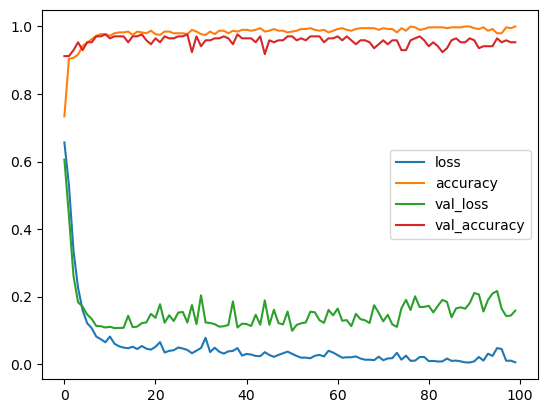

In [45]:
losses = pd.DataFrame(ANN.history.history)
losses.plot()

In [46]:
prediction_8 = ANN.predict(X_test)
prediction_8 = prediction_8 > 0.5

6/6 [==============================] - 0s 3ms/step


In [47]:
print(classification_report(prediction_8,y_test))
print(confusion_matrix(y_test,prediction_8))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94        68
        True       0.95      0.97      0.96       103

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[ 63   3]
 [  5 100]]


### KNN and SVM were the best models

In [59]:
import random
n = random.randint(1, len(BC))
sample_patient_info = BC.iloc[n]
sample_patient = sample_patient_info[:-1]

In [80]:
prediction = KNN.predict(sample_patient.values.reshape(1,30))

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
prediction

array([0], dtype=int64)

In [85]:
sample_patient_info[-1:]

benign_0__mal_1    0.0
Name: 105, dtype: float64